In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
df.dropna(inplace=True)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [5]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [8]:
df_penguins = df.copy()
df_penguins['species'] = df_penguins['species'].apply(lambda x: 1 if x == 'Adelie' else 0)
df_penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,Torgersen,39.1,18.7,181.0,3750.0,Male
1,1,Torgersen,39.5,17.4,186.0,3800.0,Female
2,1,Torgersen,40.3,18.0,195.0,3250.0,Female
4,1,Torgersen,36.7,19.3,193.0,3450.0,Female
5,1,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,0,Biscoe,47.2,13.7,214.0,4925.0,Female
340,0,Biscoe,46.8,14.3,215.0,4850.0,Female
341,0,Biscoe,50.4,15.7,222.0,5750.0,Male
342,0,Biscoe,45.2,14.8,212.0,5200.0,Female


In [9]:
df['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [17]:
df_penguins['species'].value_counts(True)

0    0.561562
1    0.438438
Name: species, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [26]:
df_penguins_train, df_penguins_test = train_test_split(df_penguins,
                                                        test_size=0.2,
                                                        stratify=df_penguins['species'],
                                                        random_state=42)

In [27]:
df_penguins_train

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
28,1,Biscoe,37.9,18.6,172.0,3150.0,Female
236,0,Biscoe,42.0,13.5,210.0,4150.0,Female
263,0,Biscoe,49.6,15.0,216.0,4750.0,Male
177,0,Dream,52.0,19.0,197.0,4150.0,Male
242,0,Biscoe,46.5,14.5,213.0,4400.0,Female
...,...,...,...,...,...,...,...
208,0,Dream,45.2,16.6,191.0,3250.0,Female
50,1,Biscoe,39.6,17.7,186.0,3500.0,Female
220,0,Biscoe,46.1,13.2,211.0,4500.0,Female
291,0,Biscoe,46.4,15.6,221.0,5000.0,Male


In [28]:
df_penguins_train['species'].value_counts(True)

0    0.56015
1    0.43985
Name: species, dtype: float64

In [29]:
df_penguins_test

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
305,0,Biscoe,50.8,17.3,228.0,5600.0,Male
43,1,Dream,44.1,19.7,196.0,4400.0,Male
140,1,Dream,40.2,17.1,193.0,3400.0,Female
303,0,Biscoe,50.0,15.9,224.0,5350.0,Male
64,1,Biscoe,36.4,17.1,184.0,2850.0,Female
...,...,...,...,...,...,...,...
206,0,Dream,42.5,17.3,187.0,3350.0,Female
139,1,Dream,39.7,17.9,193.0,4250.0,Male
282,0,Biscoe,45.7,13.9,214.0,4400.0,Female
1,1,Torgersen,39.5,17.4,186.0,3800.0,Female


In [30]:
df_penguins_test['species'].value_counts(True)

0    0.567164
1    0.432836
Name: species, dtype: float64

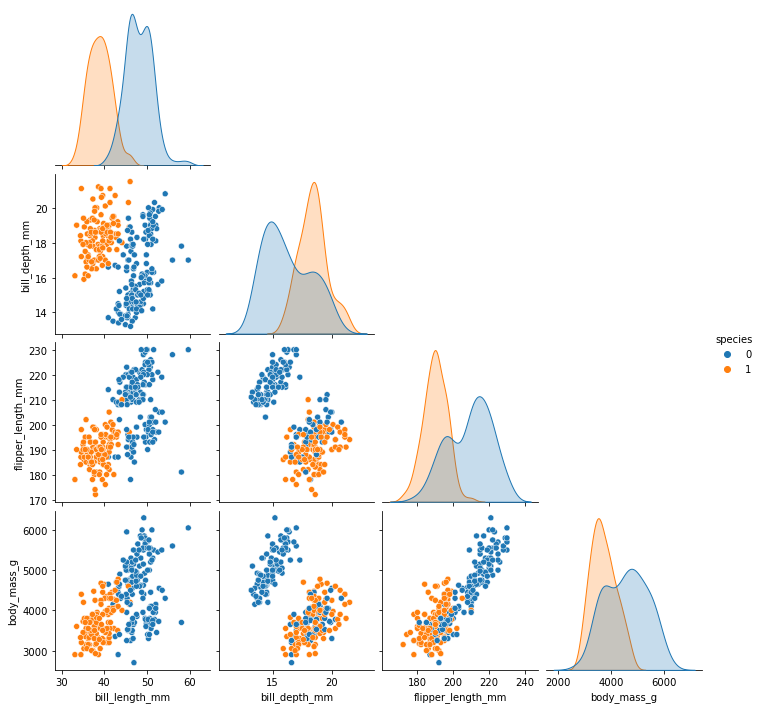

In [32]:
sns.pairplot(df_penguins_train, hue='species', corner=True);

Single feature candidate: bill_length_mm, flipper_length_mm

**Single Feature**

In [35]:
# Define X, y
X_train = df_penguins_train[['bill_length_mm']]
y_train = df_penguins_train[['species']]
X_test = df_penguins_test[['bill_length_mm']]
y_test = df_penguins_test[['species']]

# Initialize the model
log_reg = LogisticRegression(random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [36]:
log_reg.coef_

array([[-1.1251864]])

In [37]:
log_reg.intercept_

array([48.47867968])

In [38]:
# Predict
new_data = [[43]]
log_reg.predict(new_data)

array([1], dtype=int64)

In [39]:
log_reg.predict_proba(new_data)

array([[0.47610212, 0.52389788]])

P(Y=1) = 0.52389788

P(Y=0) = 0.47610212

In [42]:
log_reg.classes_

array([0, 1], dtype=int64)

In [44]:
# Odds-Ratio
np.exp(log_reg.coef_ * 1)

0.3245919577781022

**Interpretation of OR**

For a penguin with bill_length 1mm longer, that penguin is about 0.32 times more likely to be predicted as Adelie.

In [45]:
# Model evaluation
log_reg.score(X_train, y_train) # Train set accuracy

0.9548872180451128

In [46]:
log_reg.score(X_test, y_test) # Test set accuracy

0.8955223880597015

**Multiple Features**

In [47]:
# Define X, y
X_train_multiple = df_penguins_train[['bill_length_mm', 'flipper_length_mm']]
X_test_multiple = df_penguins_test[['bill_length_mm', 'flipper_length_mm']]


# Initialize the model
log_reg_multiple = LogisticRegression(random_state=42)

# Train the model
log_reg_multiple.fit(X_train_multiple, y_train)

LogisticRegression(random_state=42)

In [48]:
log_reg_multiple.coef_

array([[-0.99676604, -0.12129309]])

In [49]:
log_reg_multiple.intercept_

array([67.14599277])

In [50]:
# Predict
new_data = [[43, 205]]
log_reg_multiple.predict(new_data)

array([0], dtype=int64)

In [51]:
log_reg_multiple.predict_proba(new_data)

array([[0.64107425, 0.35892575]])

In [52]:
log_reg_multiple.score(X_train_multiple, y_train) # Train set accuracy

0.9699248120300752

In [53]:
log_reg_multiple.score(X_test_multiple, y_test) # Test set accuracy

0.9402985074626866

In [55]:
custom_threshold = 0.8
np.where(log_reg_multiple.predict_proba(X_test_multiple) >= custom_threshold)[1]

array([0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0], dtype=int64)

In [58]:
np.where(log_reg_multiple.predict_proba(X_test_multiple) >= 0.5)[1]

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0], dtype=int64)

In [59]:
log_reg_multiple.predict_proba(X_test_multiple)

array([[9.99985546e-01, 1.44536972e-05],
       [6.42179090e-01, 3.57820910e-01],
       [2.49301258e-02, 9.75069874e-01],
       [9.99947883e-01, 5.21173423e-05],
       [1.94325637e-04, 9.99805674e-01],
       [9.98675607e-01, 1.32439345e-03],
       [2.84172956e-02, 9.71582704e-01],
       [9.99582981e-01, 4.17018581e-04],
       [1.39937437e-01, 8.60062563e-01],
       [5.07353866e-02, 9.49264613e-01],
       [9.99999844e-01, 1.56028657e-07],
       [2.00607302e-05, 9.99979939e-01],
       [4.72702010e-01, 5.27297990e-01],
       [2.22877405e-01, 7.77122595e-01],
       [9.99892100e-01, 1.07899528e-04],
       [2.04621879e-04, 9.99795378e-01],
       [9.99998736e-01, 1.26400860e-06],
       [4.17574911e-02, 9.58242509e-01],
       [4.95096143e-04, 9.99504904e-01],
       [9.94649488e-01, 5.35051208e-03],
       [9.98446599e-01, 1.55340058e-03],
       [9.47738026e-01, 5.22619736e-02],
       [6.28668149e-04, 9.99371332e-01],
       [3.64106858e-04, 9.99635893e-01],
       [9.962441